In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import time

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


## Hyperparameters

In [2]:
#DNN shape
n_in = 10
n_out = 1

#Optimization algorithm 
lr = 0.01
momentum = 0.9

#Training
nb_epoch = 500

## Data (test)

In [3]:
# Étape 1 : Générer des données fictives
# On crée 100 points de données avec une relation linéaire y = 3x + 5 et un peu de bruit
np.random.seed(1911)  # Pour la reproductibilité
true_weights = np.random.randn(n_in, 1)  # Poids aléatoires
true_bias = 5  # Biais
X_np = (2 * np.random.rand(100, n_in)).astype(np.float32)    # Génère des valeurs de x entre 0 et 2
y_np = (X_np.dot(true_weights) + true_bias + np.random.randn(100, 1)).astype(np.float32)    # Ajout de bruit pour le réalisme

X = torch.from_numpy(X_np)
y = torch.from_numpy(y_np)


## Model

In [4]:
class LinearNetwork(torch.nn.Module):
    def __init__(self, n_in, n_out):
        super(LinearNetwork, self).__init__()

        self.layer1 = nn.Linear(n_in,n_out) # Layer 1


    def forward(self, X):


        Y = self.layer1(X)  # Apply one layer


        return Y

model = LinearNetwork(n_in,n_out)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = momentum)


## Fitting

In [5]:
loss_tab = []
weight_diff_2 = []
for num_epoch in range(nb_epoch):

    hat_y = model(X) 
    loss = criterion(hat_y, y) # Compute loss
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 


    weight_diff_2.append(np.sum((true_weights - np.transpose(model.layer1.weight.data.numpy()))**2))
    loss_tab.append(loss.item())

    print('epoch {}, loss {}'.format(num_epoch, loss.item()))



epoch 0, loss 12.319812774658203
epoch 1, loss 9.506244659423828
epoch 2, loss 6.4291090965271
epoch 3, loss 5.358544826507568
epoch 4, loss 6.444221019744873
epoch 5, loss 7.997990131378174
epoch 6, loss 8.259685516357422
epoch 7, loss 6.887494087219238
epoch 8, loss 4.978816986083984
epoch 9, loss 3.8832473754882812
epoch 10, loss 4.0295915603637695
epoch 11, loss 4.745030403137207
epoch 12, loss 5.029109001159668
epoch 13, loss 4.453958988189697
epoch 14, loss 3.4140894412994385
epoch 15, loss 2.6405062675476074
epoch 16, loss 2.5252902507781982
epoch 17, loss 2.857480764389038
epoch 18, loss 3.113044023513794
epoch 19, loss 2.951261281967163
epoch 20, loss 2.4633307456970215
epoch 21, loss 2.012457847595215
epoch 22, loss 1.8768168687820435
epoch 23, loss 2.0314443111419678
epoch 24, loss 2.2250733375549316
epoch 25, loss 2.231665849685669
epoch 26, loss 2.033154010772705
epoch 27, loss 1.7936779260635376
epoch 28, loss 1.6864906549453735
epoch 29, loss 1.7462660074234009
epoch 30,

[12.140915734558435, 12.40465448503841, 12.806856760208529, 13.159239452918746, 13.181322915365405, 12.6728139749841, 11.640421032576823, 10.285663107383309, 8.879841080675256, 7.631238963045822, 6.6316628598922875, 5.888489954233734, 5.382995975453333, 5.095338755792859, 4.986413567482097, 4.973121364863828, 4.936598037277719, 4.767732960840076, 4.418104684219696, 3.9191554448904675, 3.3584743289127204, 2.8335842931005253, 2.4146198592773427, 2.133107386252478, 1.9911897566635344, 1.9739829175172277, 2.0536798241065894, 2.1878816715036935, 2.322258607302771, 2.4032355637974603, 2.3958935168253386, 2.296100334735836, 2.1291987076019296, 1.9367561012672447, 1.7599376576024361, 1.6280373364327054, 1.5550776635288348, 1.541699210727709, 1.578050641475639, 1.645880894418688, 1.7210889249728507, 1.778508026860966, 1.7985708555743014, 1.773113245665813, 1.707273293114363, 1.616535967149025, 1.52067304884261, 1.43761295816706, 1.3794938807325257, 1.3513459996281272, 1.3515249468202772, 1.3729

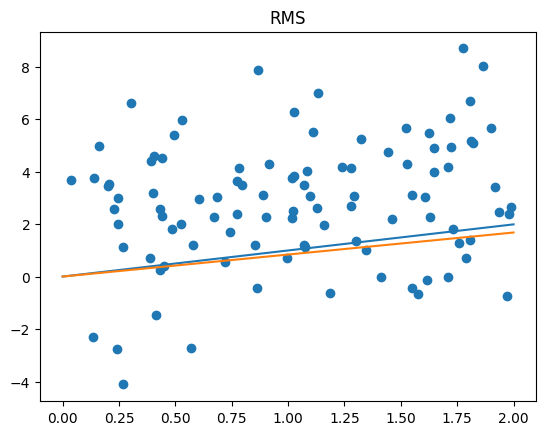

In [22]:

#plt.plot((weight_diff_2))
plt.title("RMS")
print(weight_diff_2)
print(true_weights)
print(true_bias)
print(np.transpose(model.layer1.weight.data.numpy()))
print(np.transpose(model.layer1.bias.data.numpy()))
print(np.sum((true_weights - np.transpose(model.layer1.weight.data.numpy()))**2))

plt.scatter(X_np[:,0], y_np)
plt.plot(np.linspace(0,2),true_weights[0]*np.linspace(0,2))
plt.plot(np.linspace(0,2),model.layer1.weight.data.numpy()[0,0]*np.linspace(0,2))

